In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
points_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-points/2011-combined-points.csv", encoding='unicode_escape', low_memory=False)
match_2011 = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/2011-combined-matches.csv", encoding='unicode_escape', low_memory=False)
combined = pd.merge(points_2011, match_2011, on="match_id", how="inner")
for i in range(2012, 2022):
    points = pd.read_csv(f"../data/grand-slam-point-data/combined-points/{i}-combined-points.csv", encoding='unicode_escape', low_memory=False)
    match = pd.read_csv(f"../data/grand-slam-point-data/combined-matches/{i}-combined-matches.csv", encoding='unicode_escape', low_memory=False)
    cur_year = pd.merge(points, match, on="match_id", how="inner")
    combined = pd.concat([combined, cur_year], sort=True)

points = combined
points = points[
    ["match_id", "SetNo", "P1GamesWon", "P2GamesWon", "GameNo", "GameWinner", "PointNumber", "PointWinner", "PointServer", "P1Score",
    "P2Score", "P1Winner", "P2Winner", "P1DoubleFault", "P2DoubleFault", "P1UnfErr", "P2UnfErr", "P1BreakPoint", "P2BreakPoint", "player1_new", "player2_new", "P1NetPoint", "P2NetPoint", "P1NetPointWon", "P2NetPointWon"]
].dropna(how="any")
points = points.reset_index(drop=True)
points

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,P1UnfErr,P2UnfErr,P1BreakPoint,P2BreakPoint,player1_new,player2_new,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,0.0,1.0,0.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,0.0,1.0,1.0,0.0,R Nadal,M Daniel,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini,0.0,1.0,0.0,1.0
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,0.0,0.0,0.0,0.0,N Djokovic,M Berrettini,1.0,0.0,1.0,0.0
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,0.0,0.0,1.0,0.0,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,0.0,1.0,0.0,0.0,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0


In [3]:
points3 = pd.read_csv(f"../data/points-pressure.csv", encoding='unicode_escape', low_memory=False)[["P1Errors", "P2Errors", "P1Pressure", "P2Pressure"]]
points_new = pd.concat([points, points3], axis=1)
points_new

,match_id,SetNo,P1GamesWon,P2GamesWon,GameNo,GameWinner,PointNumber,PointWinner,PointServer,P1Score,...,player1_new,player2_new,P1NetPoint,P2NetPoint,P1NetPointWon,P2NetPointWon,P1Errors,P2Errors,P1Pressure,P2Pressure
0,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,1,1.0,2.0,15,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,2,1.0,2.0,30,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2011-ausopen-1101,1.0,0.0,0.0,1.0,0.0,3,1.0,2.0,40,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2011-ausopen-1101,1.0,1.0,0.0,1.0,1.0,4,1.0,2.0,0,...,R Nadal,M Daniel,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792718,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,272,2.0,2.0,40,...,N Djokovic,M Berrettini,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0
792719,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,273,1.0,2.0,AD,...,N Djokovic,M Berrettini,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0
792720,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,274,2.0,2.0,40,...,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
792721,2021-wimbledon-1701,4.0,5.0,3.0,9.0,0.0,275,1.0,2.0,AD,...,N Djokovic,M Berrettini,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


In [4]:
##### Nadal

novake1 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 1.0)]
novake2 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 1.0)]

novake3 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 2.0)]
novake4 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 2.0)]

novake5 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 3.0)]
novake6 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 3.0)]

novake7 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 4.0)]
novake8 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 4.0)]

novake9 = points_new.loc[(points_new['player1_new'] == 'R Nadal') | (points_new['player2_new'] == 'R Nadal') & (points_new['SetNo'] == 5.0)]
novake10 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 5.0)]

novakw2 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 1.0)]
novakw4 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 2.0)]
novakw6 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 3.0)]
novakw8 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 4.0)]
novakw10 = points_new.loc[(((points_new['player1_new'] == 'R Nadal') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Nadal') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 5.0)]

##### Federer

fede1 = points_new.loc[(points_new['player1_new'] == 'R Federer') | (points_new['player2_new'] == 'R Federer') & (points_new['SetNo'] == 1.0)]
fede2 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 1.0)]

fede3 = points_new.loc[(points_new['player1_new'] == 'R Federer') | (points_new['player2_new'] == 'R Federer') & (points_new['SetNo'] == 2.0)]
fede4 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 2.0)]

fede5 = points_new.loc[(points_new['player1_new'] == 'R Federer') | (points_new['player2_new'] == 'R Federer') & (points_new['SetNo'] == 3.0)]
fede6 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 3.0)]

fede7 = points_new.loc[(points_new['player1_new'] == 'R Federer') | (points_new['player2_new'] == 'R Federer') & (points_new['SetNo'] == 4.0)]
fede8 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 4.0)]

fede9 = points_new.loc[(points_new['player1_new'] == 'R Federer') | (points_new['player2_new'] == 'R Federer') & (points_new['SetNo'] == 5.0)]
fede10 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 5.0)]

fedw2 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 1.0)]
fedw4 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 2.0)]
fedw6 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 3.0)]
fedw8 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 4.0)]
fedw10 = points_new.loc[(((points_new['player1_new'] == 'R Federer') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'R Federer') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 5.0)]

##### Ruud

case1 = points_new.loc[(points_new['player1_new'] == 'C Ruud') | (points_new['player2_new'] == 'C Ruud') & (points_new['SetNo'] == 1.0)]
case2 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 1.0)]

case3 = points_new.loc[(points_new['player1_new'] == 'C Ruud') | (points_new['player2_new'] == 'C Ruud') & (points_new['SetNo'] == 2.0)]
case4 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 2.0)]

case5 = points_new.loc[(points_new['player1_new'] == 'C Ruud') | (points_new['player2_new'] == 'C Ruud') & (points_new['SetNo'] == 3.0)]
case6 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 3.0)]

case7 = points_new.loc[(points_new['player1_new'] == 'C Ruud') | (points_new['player2_new'] == 'C Ruud') & (points_new['SetNo'] == 4.0)]
case8 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 4.0)]

case9 = points_new.loc[(points_new['player1_new'] == 'C Ruud') | (points_new['player2_new'] == 'C Ruud') & (points_new['SetNo'] == 5.0)]
case10 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 5.0)]

casw2 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 1.0)]
casw4 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 2.0)]
casw6 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 3.0)]
casw8 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 4.0)]
casw10 = points_new.loc[(((points_new['player1_new'] == 'C Ruud') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'C Ruud') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 5.0)]

##### Klizan

mare1 = points_new.loc[(points_new['player1_new'] == 'M Klizan') | (points_new['player2_new'] == 'M Klizan') & (points_new['SetNo'] == 1.0)]
mare2 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 1.0)]

mare3 = points_new.loc[(points_new['player1_new'] == 'M Klizan') | (points_new['player2_new'] == 'M Klizan') & (points_new['SetNo'] == 2.0)]
mare4 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 2.0)]

mare5 = points_new.loc[(points_new['player1_new'] == 'M Klizan') | (points_new['player2_new'] == 'M Klizan') & (points_new['SetNo'] == 3.0)]
mare6 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 3.0)]

mare7 = points_new.loc[(points_new['player1_new'] == 'M Klizan') | (points_new['player2_new'] == 'M Klizan') & (points_new['SetNo'] == 4.0)]
mare8 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 4.0)]

mare9 = points_new.loc[(points_new['player1_new'] == 'M Klizan') | (points_new['player2_new'] == 'M Klizan') & (points_new['SetNo'] == 5.0)]
mare10 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Errors'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Errors'] == 1.0))) & (points_new['SetNo'] == 5.0)]

marw2 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 1.0)]
marw4 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 2.0)]
marw6 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 3.0)]
marw8 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 4.0)]
marw10 = points_new.loc[(((points_new['player1_new'] == 'M Klizan') & (points_new['P1Winner'] == 1.0)) | ((points_new['player2_new'] == 'M Klizan') & (points_new['P2Winner'] == 1.0))) & (points_new['SetNo'] == 5.0)]


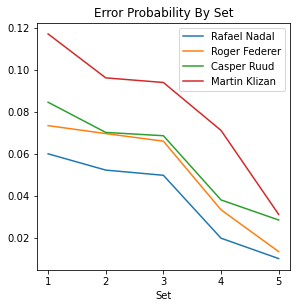

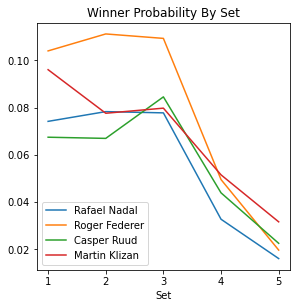

: 

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 2)
plotstat_1 = [len(novake2)/len(novake1), len(novake4)/len(novake3), len(novake6)/len(novake5), len(novake8)/len(novake7), len(novake10)/len(novake9)]
plotstat_2 = [len(fede2)/len(fede1), len(fede4)/len(fede3), len(fede6)/len(fede5), len(fede8)/len(fede7), len(fede10)/len(fede9)]
plotstat_3 = [len(case2)/len(case1), len(case4)/len(case3), len(case6)/len(case5), len(case8)/len(case7), len(case10)/len(case9)]
plotstat_4 = [len(mare2)/len(mare1), len(mare4)/len(mare3), len(mare6)/len(mare5), len(mare8)/len(mare7), len(mare10)/len(mare9)]
plt.title('Error Probability By Set')
plt.xlabel("Set")
ax.plot(range(1, 6), plotstat_1, label='Rafael Nadal')
ax.plot(range(1, 6), plotstat_2, label='Roger Federer')
ax.plot(range(1, 6), plotstat_3, label='Casper Ruud')
ax.plot(range(1, 6), plotstat_4, label='Martin Klizan')
plt.legend()
plt.savefig("../plots/error_stat_by_set.png")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(2, 2, 2)
plotstat_1 = [len(novakw2)/len(novake1), len(novakw4)/len(novake3), len(novakw6)/len(novake5), len(novakw8)/len(novake7), len(novakw10)/len(novake9)]
plotstat_2 = [len(fedw2)/len(fede1), len(fedw4)/len(fede3), len(fedw6)/len(fede5), len(fedw8)/len(fede7), len(fedw10)/len(fede9)]
plotstat_3 = [len(casw2)/len(case1), len(casw4)/len(case3), len(casw6)/len(case5), len(casw8)/len(case7), len(casw10)/len(case9)]
plotstat_4 = [len(marw2)/len(mare1), len(marw4)/len(mare3), len(marw6)/len(mare5), len(marw8)/len(mare7), len(marw10)/len(mare9)]
plt.title('Winner Probability By Set')
plt.xlabel("Set")
ax.plot(range(1, 6), plotstat_1, label='Rafael Nadal')
ax.plot(range(1, 6), plotstat_2, label='Roger Federer')
ax.plot(range(1, 6), plotstat_3, label='Casper Ruud')
ax.plot(range(1, 6), plotstat_4, label='Martin Klizan')
plt.legend()
plt.savefig("../plots/winner_stat_by_set.png")

plt.show()